5 November 2021

# Case Study: How Does a Bike-Share Navigate Speedy Success?

#### Summary

You are a junior data analyst working in the marketing analyst team at Cyclistic, a fictional bike-share company in Chicago.

#### About the company

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of more than 5,000 bicycles that are geotracked and locked into a network of more than 600 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime. Cyclistic has the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

#### Scenario

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, The director of marketing believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, The director of marketing believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic and have chosen Cyclistic for their mobility needs. 

The director of marketing has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ. The director of marketing and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

#### Task

The director of marketing has assigned you to answer: How do annual members and casual riders use Cyclistic bikes differently?

#### Data
Previous 12 months of Cyclistic trip data from November 2020 to October 2021

## Data Preparation

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.api.types import CategoricalDtype

In [2]:
# Setup workspace
sns.set_style('ticks')

In [3]:
# Import data
data_202110 = pd.read_csv('202110-divvy-tripdata.csv')
data_202109 = pd.read_csv('202109-divvy-tripdata.csv')
data_202108 = pd.read_csv('202108-divvy-tripdata.csv')
data_202107 = pd.read_csv('202107-divvy-tripdata.csv')
data_202106 = pd.read_csv('202106-divvy-tripdata.csv')
data_202105 = pd.read_csv('202105-divvy-tripdata.csv')
data_202104 = pd.read_csv('202104-divvy-tripdata.csv')
data_202103 = pd.read_csv('202103-divvy-tripdata.csv')
data_202102 = pd.read_csv('202102-divvy-tripdata.csv')
data_202101 = pd.read_csv('202101-divvy-tripdata.csv')
data_202012 = pd.read_csv('202012-divvy-tripdata.csv')
data_202011 = pd.read_csv('202011-divvy-tripdata.csv')

In [4]:
# Inspect data
data_202110.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631226 entries, 0 to 631225
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             631226 non-null  object 
 1   rideable_type       631226 non-null  object 
 2   started_at          631226 non-null  object 
 3   ended_at            631226 non-null  object 
 4   start_station_name  523016 non-null  object 
 5   start_station_id    523016 non-null  object 
 6   end_station_name    516392 non-null  object 
 7   end_station_id      516392 non-null  object 
 8   start_lat           631226 non-null  float64
 9   start_lng           631226 non-null  float64
 10  end_lat             630742 non-null  float64
 11  end_lng             630742 non-null  float64
 12  member_casual       631226 non-null  object 
dtypes: float64(4), object(9)
memory usage: 62.6+ MB


In [5]:
# Remove start_station_id and end_station_id column since the id got rename in 2021 and also remove any missing values
data1 = data_202110.drop(['start_station_id','end_station_id'], axis=1)
data1 = data1.dropna(axis=0, how="any")
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477972 entries, 25 to 631225
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             477972 non-null  object 
 1   rideable_type       477972 non-null  object 
 2   started_at          477972 non-null  object 
 3   ended_at            477972 non-null  object 
 4   start_station_name  477972 non-null  object 
 5   end_station_name    477972 non-null  object 
 6   start_lat           477972 non-null  float64
 7   start_lng           477972 non-null  float64
 8   end_lat             477972 non-null  float64
 9   end_lng             477972 non-null  float64
 10  member_casual       477972 non-null  object 
dtypes: float64(4), object(7)
memory usage: 43.8+ MB


In [6]:
data_202109.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756147 entries, 0 to 756146
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             756147 non-null  object 
 1   rideable_type       756147 non-null  object 
 2   started_at          756147 non-null  object 
 3   ended_at            756147 non-null  object 
 4   start_station_name  663034 non-null  object 
 5   start_station_id    663036 non-null  object 
 6   end_station_name    656886 non-null  object 
 7   end_station_id      656886 non-null  object 
 8   start_lat           756147 non-null  float64
 9   start_lng           756147 non-null  float64
 10  end_lat             755552 non-null  float64
 11  end_lng             755552 non-null  float64
 12  member_casual       756147 non-null  object 
dtypes: float64(4), object(9)
memory usage: 75.0+ MB


In [7]:
data2 = data_202109.drop(['start_station_id','end_station_id'], axis=1)
data2 = data2.dropna(axis=0, how="any")
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621150 entries, 59 to 756146
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             621150 non-null  object 
 1   rideable_type       621150 non-null  object 
 2   started_at          621150 non-null  object 
 3   ended_at            621150 non-null  object 
 4   start_station_name  621150 non-null  object 
 5   end_station_name    621150 non-null  object 
 6   start_lat           621150 non-null  float64
 7   start_lng           621150 non-null  float64
 8   end_lat             621150 non-null  float64
 9   end_lng             621150 non-null  float64
 10  member_casual       621150 non-null  object 
dtypes: float64(4), object(7)
memory usage: 56.9+ MB


In [8]:
data_202108.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804352 entries, 0 to 804351
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             804352 non-null  object 
 1   rideable_type       804352 non-null  object 
 2   started_at          804352 non-null  object 
 3   ended_at            804352 non-null  object 
 4   start_station_name  715894 non-null  object 
 5   start_station_id    715894 non-null  object 
 6   end_station_name    710237 non-null  object 
 7   end_station_id      710237 non-null  object 
 8   start_lat           804352 non-null  float64
 9   start_lng           804352 non-null  float64
 10  end_lat             803646 non-null  float64
 11  end_lng             803646 non-null  float64
 12  member_casual       804352 non-null  object 
dtypes: float64(4), object(9)
memory usage: 79.8+ MB


In [9]:
data3 = data_202108.drop(['start_station_id','end_station_id'], axis=1)
data3 = data3.dropna(axis=0, how="any")
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674409 entries, 30 to 804351
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             674409 non-null  object 
 1   rideable_type       674409 non-null  object 
 2   started_at          674409 non-null  object 
 3   ended_at            674409 non-null  object 
 4   start_station_name  674409 non-null  object 
 5   end_station_name    674409 non-null  object 
 6   start_lat           674409 non-null  float64
 7   start_lng           674409 non-null  float64
 8   end_lat             674409 non-null  float64
 9   end_lng             674409 non-null  float64
 10  member_casual       674409 non-null  object 
dtypes: float64(4), object(7)
memory usage: 61.7+ MB


In [10]:
data_202107.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822410 entries, 0 to 822409
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             822410 non-null  object 
 1   rideable_type       822410 non-null  object 
 2   started_at          822410 non-null  object 
 3   ended_at            822410 non-null  object 
 4   start_station_name  735147 non-null  object 
 5   start_station_id    735148 non-null  object 
 6   end_station_name    729252 non-null  object 
 7   end_station_id      729252 non-null  object 
 8   start_lat           822410 non-null  float64
 9   start_lng           822410 non-null  float64
 10  end_lat             821679 non-null  float64
 11  end_lng             821679 non-null  float64
 12  member_casual       822410 non-null  object 
dtypes: float64(4), object(9)
memory usage: 81.6+ MB


In [11]:
data4 = data_202107.drop(['start_station_id','end_station_id'], axis=1)
data4 = data4.dropna(axis=0, how="any")
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692321 entries, 0 to 822359
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             692321 non-null  object 
 1   rideable_type       692321 non-null  object 
 2   started_at          692321 non-null  object 
 3   ended_at            692321 non-null  object 
 4   start_station_name  692321 non-null  object 
 5   end_station_name    692321 non-null  object 
 6   start_lat           692321 non-null  float64
 7   start_lng           692321 non-null  float64
 8   end_lat             692321 non-null  float64
 9   end_lng             692321 non-null  float64
 10  member_casual       692321 non-null  object 
dtypes: float64(4), object(7)
memory usage: 63.4+ MB


In [12]:
data_202106.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729595 entries, 0 to 729594
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             729595 non-null  object 
 1   rideable_type       729595 non-null  object 
 2   started_at          729595 non-null  object 
 3   ended_at            729595 non-null  object 
 4   start_station_name  649502 non-null  object 
 5   start_station_id    649502 non-null  object 
 6   end_station_name    643208 non-null  object 
 7   end_station_id      643208 non-null  object 
 8   start_lat           729595 non-null  float64
 9   start_lng           729595 non-null  float64
 10  end_lat             728878 non-null  float64
 11  end_lng             728878 non-null  float64
 12  member_casual       729595 non-null  object 
dtypes: float64(4), object(9)
memory usage: 72.4+ MB


In [13]:
data5 = data_202106.drop(['start_station_id','end_station_id'], axis=1)
data5 = data5.dropna(axis=0, how="any")
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608778 entries, 50 to 729592
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             608778 non-null  object 
 1   rideable_type       608778 non-null  object 
 2   started_at          608778 non-null  object 
 3   ended_at            608778 non-null  object 
 4   start_station_name  608778 non-null  object 
 5   end_station_name    608778 non-null  object 
 6   start_lat           608778 non-null  float64
 7   start_lng           608778 non-null  float64
 8   end_lat             608778 non-null  float64
 9   end_lng             608778 non-null  float64
 10  member_casual       608778 non-null  object 
dtypes: float64(4), object(7)
memory usage: 55.7+ MB


In [14]:
data_202105.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531633 entries, 0 to 531632
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             531633 non-null  object 
 1   rideable_type       531633 non-null  object 
 2   started_at          531633 non-null  object 
 3   ended_at            531633 non-null  object 
 4   start_station_name  477889 non-null  object 
 5   start_station_id    477889 non-null  object 
 6   end_station_name    473439 non-null  object 
 7   end_station_id      473439 non-null  object 
 8   start_lat           531633 non-null  float64
 9   start_lng           531633 non-null  float64
 10  end_lat             531181 non-null  float64
 11  end_lng             531181 non-null  float64
 12  member_casual       531633 non-null  object 
dtypes: float64(4), object(9)
memory usage: 52.7+ MB


In [15]:
data6 = data_202105.drop(['start_station_id','end_station_id'], axis=1)
data6 = data6.dropna(axis=0, how="any")
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450994 entries, 25 to 531632
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             450994 non-null  object 
 1   rideable_type       450994 non-null  object 
 2   started_at          450994 non-null  object 
 3   ended_at            450994 non-null  object 
 4   start_station_name  450994 non-null  object 
 5   end_station_name    450994 non-null  object 
 6   start_lat           450994 non-null  float64
 7   start_lng           450994 non-null  float64
 8   end_lat             450994 non-null  float64
 9   end_lng             450994 non-null  float64
 10  member_casual       450994 non-null  object 
dtypes: float64(4), object(7)
memory usage: 41.3+ MB


In [16]:
data_202104.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337230 entries, 0 to 337229
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337230 non-null  object 
 1   rideable_type       337230 non-null  object 
 2   started_at          337230 non-null  object 
 3   ended_at            337230 non-null  object 
 4   start_station_name  311174 non-null  object 
 5   start_station_id    311174 non-null  object 
 6   end_station_name    309056 non-null  object 
 7   end_station_id      309056 non-null  object 
 8   start_lat           337230 non-null  float64
 9   start_lng           337230 non-null  float64
 10  end_lat             336963 non-null  float64
 11  end_lng             336963 non-null  float64
 12  member_casual       337230 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.4+ MB


In [17]:
data7 = data_202104.drop(['start_station_id','end_station_id'], axis=1)
data7 = data7.dropna(axis=0, how="any")
data7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298207 entries, 0 to 337229
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             298207 non-null  object 
 1   rideable_type       298207 non-null  object 
 2   started_at          298207 non-null  object 
 3   ended_at            298207 non-null  object 
 4   start_station_name  298207 non-null  object 
 5   end_station_name    298207 non-null  object 
 6   start_lat           298207 non-null  float64
 7   start_lng           298207 non-null  float64
 8   end_lat             298207 non-null  float64
 9   end_lng             298207 non-null  float64
 10  member_casual       298207 non-null  object 
dtypes: float64(4), object(7)
memory usage: 27.3+ MB


In [18]:
data_202103.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228496 entries, 0 to 228495
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             228496 non-null  object 
 1   rideable_type       228496 non-null  object 
 2   started_at          228496 non-null  object 
 3   ended_at            228496 non-null  object 
 4   start_station_name  213648 non-null  object 
 5   start_station_id    213648 non-null  object 
 6   end_station_name    211769 non-null  object 
 7   end_station_id      211769 non-null  object 
 8   start_lat           228496 non-null  float64
 9   start_lng           228496 non-null  float64
 10  end_lat             228329 non-null  float64
 11  end_lng             228329 non-null  float64
 12  member_casual       228496 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.7+ MB


In [19]:
data8 = data_202103.drop(['start_station_id','end_station_id'], axis=1)
data8 = data8.dropna(axis=0, how="any")
data8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205691 entries, 0 to 228494
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             205691 non-null  object 
 1   rideable_type       205691 non-null  object 
 2   started_at          205691 non-null  object 
 3   ended_at            205691 non-null  object 
 4   start_station_name  205691 non-null  object 
 5   end_station_name    205691 non-null  object 
 6   start_lat           205691 non-null  float64
 7   start_lng           205691 non-null  float64
 8   end_lat             205691 non-null  float64
 9   end_lng             205691 non-null  float64
 10  member_casual       205691 non-null  object 
dtypes: float64(4), object(7)
memory usage: 18.8+ MB


In [20]:
data_202102.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             49622 non-null  object 
 1   rideable_type       49622 non-null  object 
 2   started_at          49622 non-null  object 
 3   ended_at            49622 non-null  object 
 4   start_station_name  45576 non-null  object 
 5   start_station_id    45576 non-null  object 
 6   end_station_name    44264 non-null  object 
 7   end_station_id      44264 non-null  object 
 8   start_lat           49622 non-null  float64
 9   start_lng           49622 non-null  float64
 10  end_lat             49408 non-null  float64
 11  end_lng             49408 non-null  float64
 12  member_casual       49622 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.9+ MB


In [21]:
data9 = data_202102.drop(['start_station_id','end_station_id'], axis=1)
data9 = data9.dropna(axis=0, how="any")
data9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42996 entries, 0 to 49620
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             42996 non-null  object 
 1   rideable_type       42996 non-null  object 
 2   started_at          42996 non-null  object 
 3   ended_at            42996 non-null  object 
 4   start_station_name  42996 non-null  object 
 5   end_station_name    42996 non-null  object 
 6   start_lat           42996 non-null  float64
 7   start_lng           42996 non-null  float64
 8   end_lat             42996 non-null  float64
 9   end_lng             42996 non-null  float64
 10  member_casual       42996 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.9+ MB


In [22]:
data_202101.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB


In [23]:
data10 = data_202101.drop(['start_station_id','end_station_id'], axis=1)
data10 = data10.dropna(axis=0, how="any")
data10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83509 entries, 9 to 96833
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             83509 non-null  object 
 1   rideable_type       83509 non-null  object 
 2   started_at          83509 non-null  object 
 3   ended_at            83509 non-null  object 
 4   start_station_name  83509 non-null  object 
 5   end_station_name    83509 non-null  object 
 6   start_lat           83509 non-null  float64
 7   start_lng           83509 non-null  float64
 8   end_lat             83509 non-null  float64
 9   end_lng             83509 non-null  float64
 10  member_casual       83509 non-null  object 
dtypes: float64(4), object(7)
memory usage: 7.6+ MB


In [24]:
data_202012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131573 entries, 0 to 131572
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             131573 non-null  object 
 1   rideable_type       131573 non-null  object 
 2   started_at          131573 non-null  object 
 3   ended_at            131573 non-null  object 
 4   start_station_name  119874 non-null  object 
 5   start_station_id    119874 non-null  object 
 6   end_station_name    118336 non-null  object 
 7   end_station_id      118336 non-null  object 
 8   start_lat           131573 non-null  float64
 9   start_lng           131573 non-null  float64
 10  end_lat             131462 non-null  float64
 11  end_lng             131462 non-null  float64
 12  member_casual       131573 non-null  object 
dtypes: float64(4), object(9)
memory usage: 13.0+ MB


In [25]:
data11 = data_202012.drop(['start_station_id','end_station_id'], axis=1)
data11 = data11.dropna(axis=0, how="any")
data11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113911 entries, 0 to 131572
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             113911 non-null  object 
 1   rideable_type       113911 non-null  object 
 2   started_at          113911 non-null  object 
 3   ended_at            113911 non-null  object 
 4   start_station_name  113911 non-null  object 
 5   end_station_name    113911 non-null  object 
 6   start_lat           113911 non-null  float64
 7   start_lng           113911 non-null  float64
 8   end_lat             113911 non-null  float64
 9   end_lng             113911 non-null  float64
 10  member_casual       113911 non-null  object 
dtypes: float64(4), object(7)
memory usage: 10.4+ MB


In [26]:
data_202011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259716 entries, 0 to 259715
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             259716 non-null  object 
 1   rideable_type       259716 non-null  object 
 2   started_at          259716 non-null  object 
 3   ended_at            259716 non-null  object 
 4   start_station_name  235392 non-null  object 
 5   start_station_id    235282 non-null  float64
 6   end_station_name    232967 non-null  object 
 7   end_station_id      232890 non-null  float64
 8   start_lat           259716 non-null  float64
 9   start_lng           259716 non-null  float64
 10  end_lat             259432 non-null  float64
 11  end_lng             259432 non-null  float64
 12  member_casual       259716 non-null  object 
dtypes: float64(6), object(7)
memory usage: 25.8+ MB


In [27]:
data12 = data_202011.drop(['start_station_id','end_station_id'], axis=1)
data12 = data12.dropna(axis=0, how="any")
data12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222936 entries, 0 to 259715
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             222936 non-null  object 
 1   rideable_type       222936 non-null  object 
 2   started_at          222936 non-null  object 
 3   ended_at            222936 non-null  object 
 4   start_station_name  222936 non-null  object 
 5   end_station_name    222936 non-null  object 
 6   start_lat           222936 non-null  float64
 7   start_lng           222936 non-null  float64
 8   end_lat             222936 non-null  float64
 9   end_lng             222936 non-null  float64
 10  member_casual       222936 non-null  object 
dtypes: float64(4), object(7)
memory usage: 20.4+ MB


In [28]:
# Combine all data into one big data frame
df = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12])
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492874 entries, 0 to 4492873
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   end_station_name    object 
 6   start_lat           float64
 7   start_lng           float64
 8   end_lat             float64
 9   end_lng             float64
 10  member_casual       object 
dtypes: float64(4), object(7)
memory usage: 377.1+ MB


## Data Cleaning

In [29]:
# Inspect top data
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member


In [30]:
# Inspect bottom data
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
4492869,A9FA0D0987E7622B,docked_bike,2020-11-20 17:09:08,2020-11-20 17:13:31,Wentworth Ave & Cermak Rd,Michigan Ave & 18th St,41.853084,-87.631931,41.857813,-87.624550,member
4492870,4C5FE357D0F8F9B2,docked_bike,2020-11-02 18:53:59,2020-11-02 19:01:03,Michigan Ave & 18th St,Indiana Ave & 26th St,41.857813,-87.624550,41.845687,-87.622481,member
4492871,46867105425F25E3,docked_bike,2020-11-07 19:05:03,2020-11-07 19:36:00,Lake Shore Dr & Monroe St,Theater on the Lake,41.880958,-87.616743,41.926277,-87.630834,member
4492872,2830FAF63F52A386,docked_bike,2020-11-08 11:47:53,2020-11-08 12:12:17,Michigan Ave & 18th St,Michigan Ave & 18th St,41.857813,-87.624550,41.857813,-87.624550,member
4492873,1F63CF7D89D892BF,docked_bike,2020-11-07 11:44:43,2020-11-07 11:53:14,Lincoln Ave & Sunnyside Ave,Lincoln Ave & Belle Plaine Ave,41.963004,-87.684781,41.956004,-87.680161,casual


In [31]:
# Check for missing values
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [32]:
# Trim all extra spaces for string data type column
df['ride_id'] = df['ride_id'].str.strip()
df['rideable_type'] = df['rideable_type'].str.strip()
df['started_at'] = df['started_at'].str.strip()
df['ended_at'] = df['ended_at'].str.strip()
df['start_station_name'] = df['start_station_name'].str.strip()
df['end_station_name'] = df['end_station_name'].str.strip()
df['member_casual'] = df['member_casual'].str.strip()

In [33]:
# Check for duplicate values
duplicates = df.duplicated(subset = 'ride_id', keep = False)
df[duplicates].sort_values(by='ride_id').head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
4353785,021A73F8C18B932D,docked_bike,2020-11-25 16:35:39,2020-11-25 16:48:02,Clark St & Winnemac Ave,Ravenswood Ave & Berteau Ave,41.973347,-87.667855,41.957921,-87.673567,member
4169549,021A73F8C18B932D,docked_bike,2020-12-15 12:15:58,2020-11-25 16:48:02,Clark St & Winnemac Ave,Ravenswood Ave & Berteau Ave,41.973347,-87.667855,41.957921,-87.673567,member
4324901,0334987B57662109,docked_bike,2020-11-25 16:15:04,2020-11-25 16:22:04,Broadway & Berwyn Ave,Lakefront Trail & Bryn Mawr Ave,41.978353,-87.659753,41.984037,-87.652310,member
4182350,0334987B57662109,docked_bike,2020-12-15 11:56:33,2020-11-25 16:22:04,Broadway & Berwyn Ave,Lakefront Trail & Bryn Mawr Ave,41.978353,-87.659753,41.984037,-87.652310,member
4191406,038CAB4A84D9A56B,docked_bike,2020-12-15 11:57:41,2020-11-25 16:24:56,Wabash Ave & 9th St,Wabash Ave & 9th St,41.870769,-87.625734,41.870769,-87.625734,member


In [34]:
# Count duplicate values
df[duplicates]['ride_id'].count()

416

In [35]:
# Remove duplicate values
df1 = df.drop_duplicates(subset='ride_id', keep='last')
df1.reset_index(drop=True, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492666 entries, 0 to 4492665
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   end_station_name    object 
 6   start_lat           float64
 7   start_lng           float64
 8   end_lat             float64
 9   end_lng             float64
 10  member_casual       object 
dtypes: float64(4), object(7)
memory usage: 377.0+ MB


In [36]:
# Check after remove duplicate values
df1[df1['ride_id'].isin(df[duplicates]['ride_id'])].sort_values(by='ride_id').head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
4353577,021A73F8C18B932D,docked_bike,2020-11-25 16:35:39,2020-11-25 16:48:02,Clark St & Winnemac Ave,Ravenswood Ave & Berteau Ave,41.973347,-87.667855,41.957921,-87.673567,member
4324693,0334987B57662109,docked_bike,2020-11-25 16:15:04,2020-11-25 16:22:04,Broadway & Berwyn Ave,Lakefront Trail & Bryn Mawr Ave,41.978353,-87.659753,41.984037,-87.652310,member
4309815,038CAB4A84D9A56B,docked_bike,2020-11-25 16:08:05,2020-11-25 16:24:56,Wabash Ave & 9th St,Wabash Ave & 9th St,41.870769,-87.625734,41.870769,-87.625734,member
4322205,0425DA22910BD202,docked_bike,2020-11-25 08:32:26,2020-11-25 08:49:25,Desplaines St & Jackson Blvd,Stetson Ave & South Water St,41.878287,-87.643909,41.886835,-87.622320,member
4475123,05498BABECEB55B0,docked_bike,2020-11-25 08:42:12,2020-11-25 08:51:27,Clinton St & Madison St,Cityfront Plaza Dr & Pioneer Ct,41.882242,-87.641066,41.890573,-87.622072,member


In [37]:
# Inspect start_station_name column
df1['start_station_name'].value_counts().to_frame().head()

,start_station_name
Streeter Dr & Grand Ave,78820
Michigan Ave & Oak St,43059
Wells St & Concord Ln,40718
Millennium Park,39898
Clark St & Elm St,39083


In [38]:
# Inspect end_station_name_column
df1['end_station_name'].value_counts().to_frame().head()

,end_station_name
Streeter Dr & Grand Ave,79959
Michigan Ave & Oak St,43772
Wells St & Concord Ln,41196
Millennium Park,41098
Clark St & Elm St,38719


In [39]:
# Inspect rideable_type column
df1.rideable_type.value_counts().to_frame()

,rideable_type
classic_bike,3058489
electric_bike,970510
docked_bike,463667


In [40]:
# Inspect member_casual column
df1.member_casual.value_counts().to_frame()

,member_casual
member,2461711
casual,2030955


In [41]:
# Copy data frame
df2 = df1.copy()
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member


In [42]:
# Inspect data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492666 entries, 0 to 4492665
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   end_station_name    object 
 6   start_lat           float64
 7   start_lng           float64
 8   end_lat             float64
 9   end_lng             float64
 10  member_casual       object 
dtypes: float64(4), object(7)
memory usage: 377.0+ MB


In [43]:
# Convert rideable_type and member_casual column into category
df2["rideable_type"] = df2["rideable_type"].astype("category")
df2["member_casual"] = df2["member_casual"].astype("category")

In [44]:
# Convert started_at and ended_at column into datetime
df2['started_at'] = pd.to_datetime(df2['started_at'])
df2['ended_at'] = pd.to_datetime(df2['ended_at'])

In [45]:
# Inspect again after conversion
df2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member


In [46]:
# Inspect data types again
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492666 entries, 0 to 4492665
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(3)
memory usage: 317.1+ MB


In [47]:
# Remove trips that are taken by staff as they service and inspect the system
df3 = df2[df2['start_station_name'] != 'Base - 2132 W Hubbard Warehouse']
df3.shape

(4492494, 11)

In [48]:
df3 = df3[df3['start_station_name'] != 'HUBBARD ST BIKE CHECKING (LBS-WH-TEST)']
df3.shape

(4492490, 11)

In [49]:
df3 = df3[df3['start_station_name'] != 'DIVVY CASSETTE REPAIR MOBILE STATION']
df3.shape

(4492486, 11)

In [50]:
df3 = df3[df3['start_station_name'] != 'WATSON TESTING - DIVVY']
df3.shape

(4492385, 11)

In [51]:
df3 = df3[df3['end_station_name'] != 'Base - 2132 W Hubbard Warehouse']
df3.shape

(4491970, 11)

In [52]:
df3 = df3[df3['end_station_name'] != 'HUBBARD ST BIKE CHECKING (LBS-WH-TEST)']
df3.shape

(4491957, 11)

In [53]:
df3 = df3[df3['end_station_name'] != 'DIVVY CASSETTE REPAIR MOBILE STATION']
df3.shape

(4491953, 11)

In [54]:
df3.reset_index(drop=True, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4491953 entries, 0 to 4491952
Data columns (total 11 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(3)
memory usage: 317.0+ MB


In [55]:
# Add ride duration column for later analysis
df3['ride_len_s'] = (df3['ended_at'] - df3['started_at']).dt.total_seconds()
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0


In [56]:
# Remove "bad" data that ride_len_s was negative
df3[df3['ride_len_s'] < 0].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s
484320,BE93718DC9182ED6,classic_bike,2021-09-29 17:04:38,2021-09-29 17:04:27,Shields Ave & 28th Pl,Shields Ave & 28th Pl,41.842733,-87.635491,41.842733,-87.635491,member,-11.0
518810,6E5FD2F624AC87D3,classic_bike,2021-09-01 17:49:37,2021-09-01 17:49:31,Clybourn Ave & Division St,Clybourn Ave & Division St,41.904613,-87.640552,41.904613,-87.640552,member,-6.0
538986,FA4DC99A39C36D54,classic_bike,2021-09-29 16:53:34,2021-09-29 16:53:29,Financial Pl & Ida B Wells Dr,Financial Pl & Ida B Wells Dr,41.875024,-87.633094,41.875024,-87.633094,member,-5.0
551700,85BC495341AB2F18,electric_bike,2021-09-01 18:45:38,2021-09-01 18:45:24,Halsted St & Dickens Ave,Halsted St & Dickens Ave,41.919884,-87.648791,41.919910,-87.648777,member,-14.0
606864,4A68473D329D45C9,classic_bike,2021-09-29 18:42:50,2021-09-29 18:36:24,Ashland Ave & Division St,Ashland Ave & Division St,41.903450,-87.667747,41.903450,-87.667747,member,-386.0


In [57]:
df3[df3['ride_len_s'] < 0]['ride_len_s'].count()

1095

In [58]:
df3 = df3[df3['ride_len_s'] >= 0]
df3.shape

(4490858, 12)

In [59]:
df3.reset_index(drop=True, inplace=True)
df3.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s
4490853,A9FA0D0987E7622B,docked_bike,2020-11-20 17:09:08,2020-11-20 17:13:31,Wentworth Ave & Cermak Rd,Michigan Ave & 18th St,41.853084,-87.631931,41.857813,-87.624550,member,263.0
4490854,4C5FE357D0F8F9B2,docked_bike,2020-11-02 18:53:59,2020-11-02 19:01:03,Michigan Ave & 18th St,Indiana Ave & 26th St,41.857813,-87.624550,41.845687,-87.622481,member,424.0
4490855,46867105425F25E3,docked_bike,2020-11-07 19:05:03,2020-11-07 19:36:00,Lake Shore Dr & Monroe St,Theater on the Lake,41.880958,-87.616743,41.926277,-87.630834,member,1857.0
4490856,2830FAF63F52A386,docked_bike,2020-11-08 11:47:53,2020-11-08 12:12:17,Michigan Ave & 18th St,Michigan Ave & 18th St,41.857813,-87.624550,41.857813,-87.624550,member,1464.0
4490857,1F63CF7D89D892BF,docked_bike,2020-11-07 11:44:43,2020-11-07 11:53:14,Lincoln Ave & Sunnyside Ave,Lincoln Ave & Belle Plaine Ave,41.963004,-87.684781,41.956004,-87.680161,casual,511.0


In [60]:
# Remove any trips that were below 60 seconds in length 
# (potentially false starts or users trying to re-dock a bike to ensure it was secure)
df3[df3['ride_len_s'] < 60]['ride_len_s'].count()

57006

In [61]:
df3 = df3[df3['ride_len_s'] >= 60]
df3.shape

(4433852, 12)

In [62]:
df3.reset_index(drop=True, inplace=True)
df3.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s
4433847,A9FA0D0987E7622B,docked_bike,2020-11-20 17:09:08,2020-11-20 17:13:31,Wentworth Ave & Cermak Rd,Michigan Ave & 18th St,41.853084,-87.631931,41.857813,-87.624550,member,263.0
4433848,4C5FE357D0F8F9B2,docked_bike,2020-11-02 18:53:59,2020-11-02 19:01:03,Michigan Ave & 18th St,Indiana Ave & 26th St,41.857813,-87.624550,41.845687,-87.622481,member,424.0
4433849,46867105425F25E3,docked_bike,2020-11-07 19:05:03,2020-11-07 19:36:00,Lake Shore Dr & Monroe St,Theater on the Lake,41.880958,-87.616743,41.926277,-87.630834,member,1857.0
4433850,2830FAF63F52A386,docked_bike,2020-11-08 11:47:53,2020-11-08 12:12:17,Michigan Ave & 18th St,Michigan Ave & 18th St,41.857813,-87.624550,41.857813,-87.624550,member,1464.0
4433851,1F63CF7D89D892BF,docked_bike,2020-11-07 11:44:43,2020-11-07 11:53:14,Lincoln Ave & Sunnyside Ave,Lincoln Ave & Belle Plaine Ave,41.963004,-87.684781,41.956004,-87.680161,casual,511.0


In [63]:
# Add columns that list the year, month, day_of_week, and hour of each ride
df3['year'] = df3['started_at'].dt.year
df3['month'] = df3['started_at'].dt.month
df3['day_of_week'] = df3['started_at'].dt.day_name()
df3['hour'] = df3['started_at'].dt.hour
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,10,Tuesday,10
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,10,Wednesday,13
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,10,Saturday,10
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,10,Sunday,11
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,10,Saturday,23


In [64]:
# Inspect data again
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433852 entries, 0 to 4433851
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  ride_len_s          float64       
 12  year                int64         
 13  month               int64         
 14  day_of_week         object        
 15  hour                int64         
dtypes: category(2), datetime64[ns](2), float64(5), int64(3), object(4)
memory usage: 482.0+ MB


In [65]:
# Rename hour column
df3['hour'] = df3['hour'].replace({0:'00:00', 1:'01:00', 2:'02:00', 3:'03:00', 4:'04:00', 5:'05:00', 6:'06:00', 7:'07:00', 8:'08:00', 9:'09:00', 10:'10:00', 11:'11:00', 12:'12:00', 13:'13:00', 14:'14:00', 15:'15:00', 16:'16:00', 17:'17:00', 18:'18:00', 19:'19:00', 20:'20:00', 21:'21:00', 22:'22:00', 23:'23:00'})
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,10,Tuesday,10:00
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,10,Wednesday,13:00
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,10,Saturday,10:00
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,10,Sunday,11:00
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,10,Saturday,23:00


In [66]:
cat_type3 = CategoricalDtype(categories=['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'], ordered=True)
df3['hour'] = df3['hour'].astype(cat_type3)
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,10,Tuesday,10:00
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,10,Wednesday,13:00
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,10,Saturday,10:00
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,10,Sunday,11:00
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,10,Saturday,23:00


In [67]:
# Make categorical order for day_of_week for later analysis
cat_type = CategoricalDtype(categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)
df3['day_of_week'] = df3['day_of_week'].astype(cat_type)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433852 entries, 0 to 4433851
Data columns (total 16 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  ride_len_s          float64       
 12  year                int64         
 13  month               int64         
 14  day_of_week         category      
 15  hour                category      
dtypes: category(4), datetime64[ns](2), float64(5), int64(2), object(3)
memory usage: 422.8+ MB


In [68]:
# Make categorical order for month for later analysis
df3['month'] = df3['month'].replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'})
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,October,Tuesday,10:00
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,October,Wednesday,13:00
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,October,Saturday,10:00
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,October,Sunday,11:00
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,October,Saturday,23:00


In [69]:
cat_type2 = CategoricalDtype(categories=["November", "December", "January", "February", "March", "April", "May", "June", "July", "August", "September", "October"], ordered=True)
df3['month'] = df3['month'].astype(cat_type2)
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,October,Tuesday,10:00
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,October,Wednesday,13:00
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,October,Saturday,10:00
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,October,Sunday,11:00
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,October,Saturday,23:00


In [70]:
# Create ride length in minute column for later analysis
df3['ride_len_m'] = round(df3['ride_len_s'] / 60)
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour,ride_len_m
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,October,Tuesday,10:00,43.0
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,October,Wednesday,13:00,3.0
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,October,Saturday,10:00,102.0
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,October,Sunday,11:00,126.0
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,October,Saturday,23:00,2.0


In [71]:
df3['weekday_weekend'] = np.where(df3['day_of_week'].isin(['Saturday', 'Sunday']), 'weekend', 'weekday')
df3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour,ride_len_m,weekday_weekend
0,614B15BC42810184,docked_bike,2021-10-05 10:56:05,2021-10-05 11:38:48,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,2563.0,2021,October,Tuesday,10:00,43.0,weekday
1,ADCC6E3CF9C04688,classic_bike,2021-10-06 13:55:33,2021-10-06 13:58:16,Desplaines St & Kinzie St,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,member,163.0,2021,October,Wednesday,13:00,3.0,weekday
2,6184CC57243AEF3C,docked_bike,2021-10-16 10:19:43,2021-10-16 12:01:20,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,6097.0,2021,October,Saturday,10:00,102.0,weekend
3,DE02D027BAC5C820,docked_bike,2021-10-24 11:03:34,2021-10-24 13:10:01,Michigan Ave & Oak St,Michigan Ave & Oak St,41.900960,-87.623777,41.900960,-87.623777,casual,7587.0,2021,October,Sunday,11:00,126.0,weekend
4,E7C9BADDF2308D0D,classic_bike,2021-10-23 23:33:22,2021-10-23 23:35:27,Kingsbury St & Kinzie St,Desplaines St & Kinzie St,41.889177,-87.638506,41.888716,-87.644448,member,125.0,2021,October,Saturday,23:00,2.0,weekend


In [72]:
df3['weekday_weekend'] = df3['weekday_weekend'].astype('category')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433852 entries, 0 to 4433851
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  ride_len_s          float64       
 12  year                int64         
 13  month               category      
 14  day_of_week         category      
 15  hour                category      
 16  ride_len_m          float64       
 17  weekday_weekend     category      
dtypes: category(6), datetime64[ns](2), float64(6), int64(1), object(3)
memory usage: 4

In [73]:
# Create ride distance in kilometer column for later analysis
def haversine(s_lat, s_lon, e_lat, e_lon):
    R = 6373.0
    lat1 = np.radians(s_lat)
    lon1 = np.radians(s_lon)
    lat2 = np.radians(e_lat)
    lon2 = np.radians(e_lon)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    distance = np.round(distance)
    return distance

df3['distance_km'] = haversine(df3['start_lat'], df3['start_lng'], df3['end_lat'], df3['end_lng'])
df3.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len_s,year,month,day_of_week,hour,ride_len_m,weekday_weekend,distance_km
4433847,A9FA0D0987E7622B,docked_bike,2020-11-20 17:09:08,2020-11-20 17:13:31,Wentworth Ave & Cermak Rd,Michigan Ave & 18th St,41.853084,-87.631931,41.857813,-87.624550,member,263.0,2020,November,Friday,17:00,4.0,weekday,1.0
4433848,4C5FE357D0F8F9B2,docked_bike,2020-11-02 18:53:59,2020-11-02 19:01:03,Michigan Ave & 18th St,Indiana Ave & 26th St,41.857813,-87.624550,41.845687,-87.622481,member,424.0,2020,November,Monday,18:00,7.0,weekday,1.0
4433849,46867105425F25E3,docked_bike,2020-11-07 19:05:03,2020-11-07 19:36:00,Lake Shore Dr & Monroe St,Theater on the Lake,41.880958,-87.616743,41.926277,-87.630834,member,1857.0,2020,November,Saturday,19:00,31.0,weekend,5.0
4433850,2830FAF63F52A386,docked_bike,2020-11-08 11:47:53,2020-11-08 12:12:17,Michigan Ave & 18th St,Michigan Ave & 18th St,41.857813,-87.624550,41.857813,-87.624550,member,1464.0,2020,November,Sunday,11:00,24.0,weekend,0.0
4433851,1F63CF7D89D892BF,docked_bike,2020-11-07 11:44:43,2020-11-07 11:53:14,Lincoln Ave & Sunnyside Ave,Lincoln Ave & Belle Plaine Ave,41.963004,-87.684781,41.956004,-87.680161,casual,511.0,2020,November,Saturday,11:00,9.0,weekend,1.0


In [74]:
# Remove "bad" data that start_station_name equal to end_station_name but distance_km not equal to 0
df3[(df3.distance_km != 0) & (df3['start_station_name'] == df3['end_station_name'])].distance_km.count()

377

In [75]:
df3.drop(df3[(df3.distance_km != 0) & (df3['start_station_name'] == df3['end_station_name'])].index, inplace = True)

In [76]:
df3.reset_index(drop=True, inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4433475 entries, 0 to 4433474
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   end_station_name    object        
 6   start_lat           float64       
 7   start_lng           float64       
 8   end_lat             float64       
 9   end_lng             float64       
 10  member_casual       category      
 11  ride_len_s          float64       
 12  year                int64         
 13  month               category      
 14  day_of_week         category      
 15  hour                category      
 16  ride_len_m          float64       
 17  weekday_weekend     category      
 18  distance_km         float64       
dtypes: category(6), datetime64[ns](2), float64

## Data Analysis

In [77]:
# Descriptive analysis
desc1 = df3[['member_casual', 'rideable_type', 'start_station_name', 'end_station_name', 'month', 'day_of_week', 'hour']].describe()
display(desc1)

,member_casual,rideable_type,start_station_name,end_station_name,month,day_of_week,hour
count,4433475,4433475,4433475,4433475,4433475,4433475,4433475
unique,2,3,803,799,12,7,24
top,member,classic_bike,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,July,Saturday,17:00
freq,2423537,3018872,77690,78838,683033,811630,451608


In [78]:
desc2 = df3[['ride_len_m', 'distance_km']].describe().round(2)
display(desc2)

,ride_len_m,distance_km
count,4433475.00,4433475.00
mean,22.21,2.18
std,162.37,1.91
min,1.00,0.00
25%,7.00,1.00
50%,13.00,2.00
75%,23.00,3.00
max,55944.00,48.00


In [79]:
desc3 = df3.groupby('member_casual')['ride_len_m'].describe().round(2)
display(desc3)

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2009938.0,32.50,239.94,1.0,10.0,17.0,31.0,55944.0
member,2423537.0,13.68,17.91,1.0,6.0,10.0,17.0,1500.0


In [80]:
desc4 = df3.groupby('member_casual')['distance_km'].describe().round(2)
display(desc4)

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2009938.0,2.21,2.01,0.0,1.0,2.0,3.0,34.0
member,2423537.0,2.16,1.82,0.0,1.0,2.0,3.0,48.0


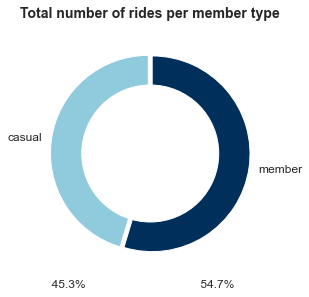

In [81]:
fig, ax = plt.subplots()
df3.groupby('member_casual').size().plot(kind='pie', startangle=90, colors=['#8fcadd', '#002f5b'], fontsize=12, ylabel='', figsize=(4.5,4.5), pctdistance=0.85, explode = (0.02, 0.02))
plt.gcf().gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Total number of rides per member type', y=1.03, fontsize=14, fontweight='bold')
plt.xlabel('       45.3%                                  54.7%', fontsize=12, loc='left')
plt.show()

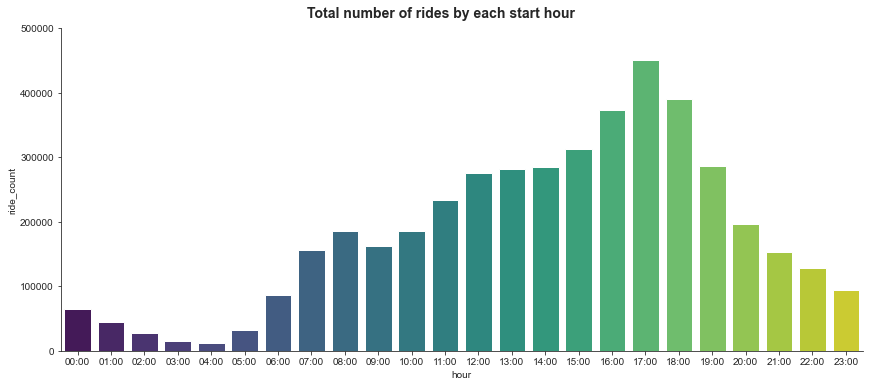

In [82]:
tab1 = df3.groupby('hour')['ride_id'].count().to_frame()
g = sns.catplot(x=tab1.index, y='ride_id', data=tab1, kind='bar', palette='viridis', height=5, aspect=2.4)
g.fig.suptitle('Total number of rides by each start hour', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='hour', ylabel='ride_count', ylim=(0, 500000))
plt.show()

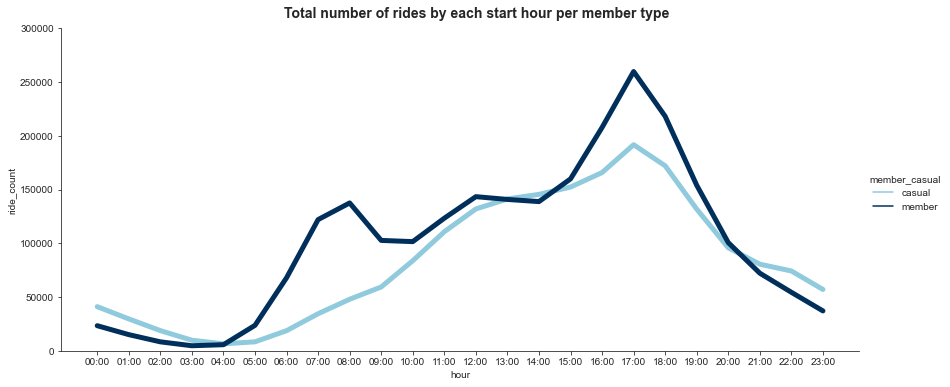

In [83]:
tab2 = df3.groupby(['hour', 'member_casual'])['ride_id'].count().to_frame().reset_index()
colors = sns.color_palette(['#8fcadd', '#002f5b'])
g = sns.relplot(x='hour', y='ride_id', hue='member_casual', data=tab2, kind='line', palette=colors, height=5, aspect=2.4, linewidth=5)
g.fig.suptitle('Total number of rides by each start hour per member type', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='hour', ylabel='ride_count', ylim=(0, 300000))
plt.show()

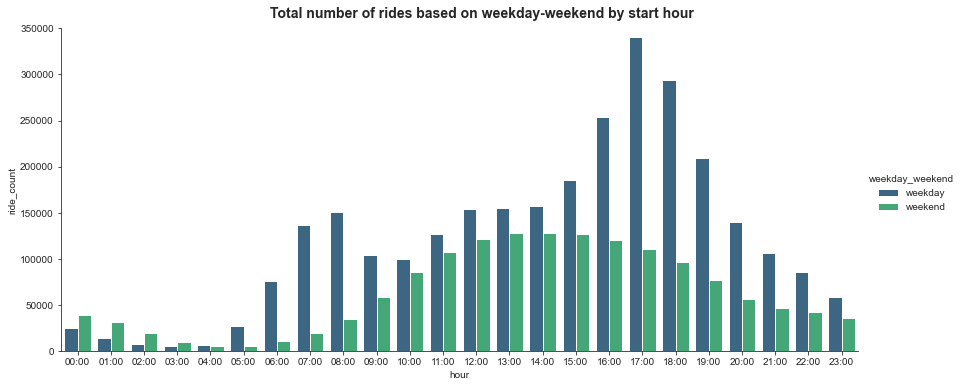

In [84]:
tab3 = df3.groupby(['hour', 'weekday_weekend'])['ride_id'].count().to_frame().reset_index()
g = sns.catplot(x='hour', y='ride_id', hue='weekday_weekend', data=tab3, kind='bar', palette='viridis', height=5, aspect=2.4)
g.fig.suptitle('Total number of rides based on weekday-weekend by start hour', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='hour', ylabel='ride_count', ylim=(0, 350000))
plt.show()

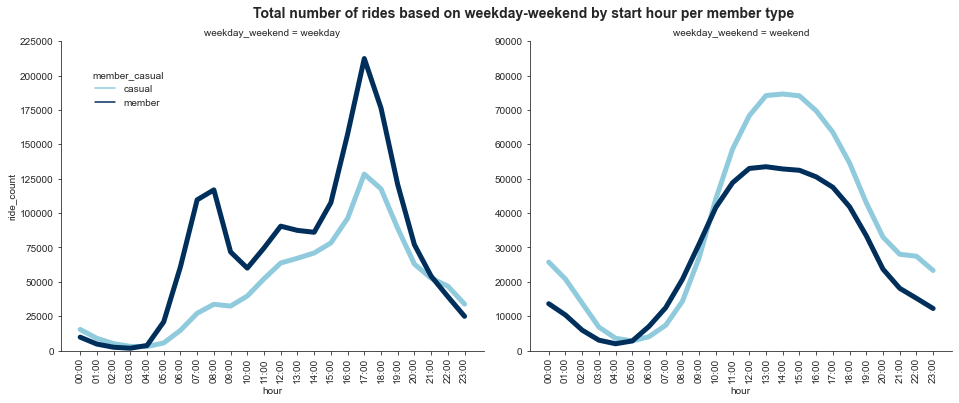

In [85]:
tab4 = df3.groupby(['hour', 'member_casual', 'weekday_weekend'])['ride_id'].count().to_frame().reset_index().rename(columns={'ride_id':'ride_count'})
g = sns.relplot(x='hour', y='ride_count', hue='member_casual', col='weekday_weekend', data=tab4, kind='line', palette=colors, height=5, aspect=1.33, linewidth=5, facet_kws = {'sharey': False,'sharex': False})
g.fig.suptitle('Total number of rides based on weekday-weekend by start hour per member type', y=1.03, fontsize=14, fontweight='bold')
g.axes[0,0].set_ylim(0,225000)
g.axes[0,1].set_ylim(0,90000)
g.fig.suptitle('Total number of rides based on weekday-weekend by start hour per member type', y=1.03, fontsize=14, fontweight='bold')
g.set_xticklabels(rotation=90)
g._legend._loc = 2
g._legend.set_bbox_to_anchor([0.08,0.95])
plt.show()

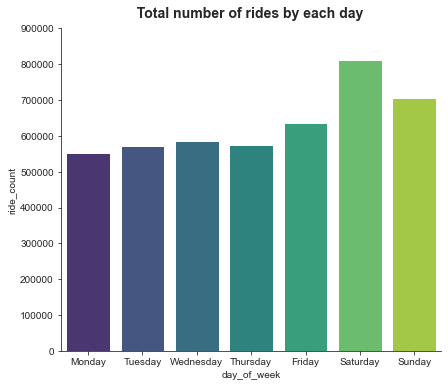

In [86]:
tab5 = df3.groupby('day_of_week')['ride_id'].count().to_frame()
g = sns.catplot(x=tab5.index, y='ride_id', data=tab5, kind='bar', palette='viridis', height=5, aspect=1.23)
g.fig.suptitle('          Total number of rides by each day', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='day_of_week', ylabel='ride_count', ylim=(0, 900000))
plt.show()

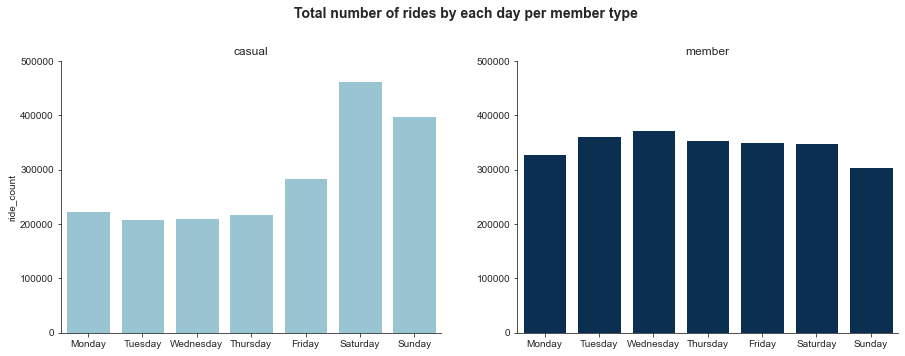

In [87]:
tab6 = df3.groupby(['day_of_week', 'member_casual'])['ride_id'].count().to_frame().reset_index().rename(columns={'ride_id':'ride_count'})
tab61 = tab6[tab6['member_casual']=='casual'].reset_index(drop=True)
tab62 = tab6[tab6['member_casual']=='member'].reset_index(drop=True)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.barplot(x='day_of_week', y='ride_count', data=tab61, color='#8fcadd', ax=ax1)
sns.barplot(x='day_of_week', y='ride_count', data=tab62, color='#002f5b', ax=ax2)
sns.despine(ax=ax1)
sns.despine(ax=ax2)
ax1.set_ylim(0, 500000)
ax2.set_ylim(0, 500000)
ax1.set_title('casual')
ax2.set_title('member')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
fig.suptitle('Total number of rides by each day per member type', y=1.03, fontsize=14, fontweight='bold')
plt.show()

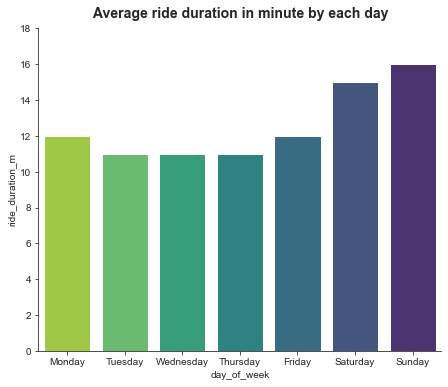

In [88]:
tab7 = df3.groupby('day_of_week')['ride_len_m'].median().to_frame()
g = sns.catplot(x=tab7.index, y='ride_len_m', data=tab7, kind='bar', palette='viridis_r', height=5, aspect=1.23)
g.fig.suptitle('     Average ride duration in minute by each day', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='day_of_week', ylabel='ride_duration_m', ylim=(0, 18))
plt.show()

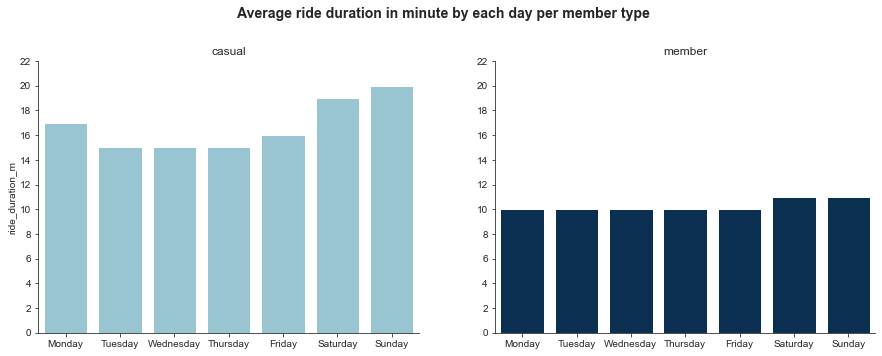

In [89]:
tab8 = df3.groupby(['day_of_week', 'member_casual'])['ride_len_m'].median().to_frame().reset_index()
tab81 = tab8[tab8['member_casual']=='casual'].reset_index(drop=True)
tab82 = tab8[tab8['member_casual']=='member'].reset_index(drop=True)
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,5))
sns.barplot(x='day_of_week', y='ride_len_m', data=tab81, color='#8fcadd', ax=ax1)
sns.barplot(x='day_of_week', y='ride_len_m', data=tab82, color='#002f5b', ax=ax2)
sns.despine(ax=ax1)
sns.despine(ax=ax2)
ax1.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax2.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax1.set_title('casual')
ax2.set_title('member')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_ylabel('ride_duration_m')
ax2.set_ylabel('')
fig.suptitle('Average ride duration in minute by each day per member type', y=1.03, fontsize=14, fontweight='bold')
plt.show()

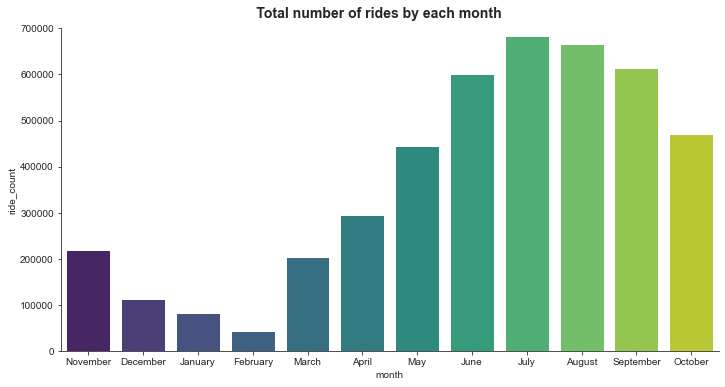

In [90]:
tab9 = df3.groupby('month')['ride_id'].count().to_frame()
g = sns.catplot(x=tab9.index, y='ride_id', data=tab9, kind='bar', palette='viridis', height=5, aspect=2)
g.fig.suptitle('     Total number of rides by each month', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='month', ylabel='ride_count', ylim=(0, 700000))
plt.show()

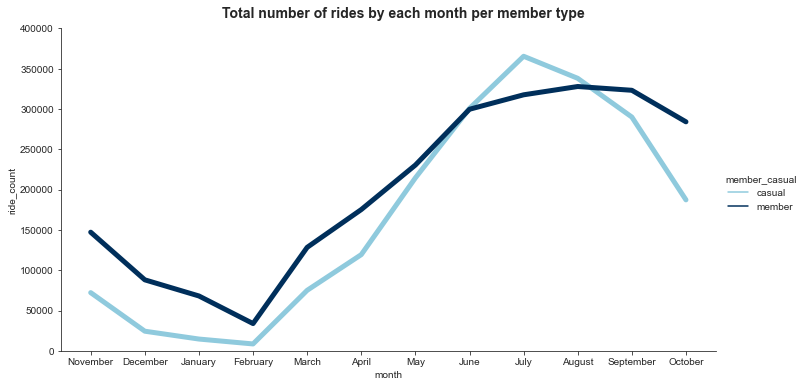

In [91]:
tab10 = df3.groupby(['month', 'member_casual'])['ride_id'].count().reset_index()
g = sns.relplot(x='month', y='ride_id', hue='member_casual', data=tab10, kind='line', palette=colors, height=5, aspect=2, linewidth=5)
g.fig.suptitle('Total number of rides by each month per member type', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='month', ylabel='ride_count', ylim=(0, 400000))
plt.show()

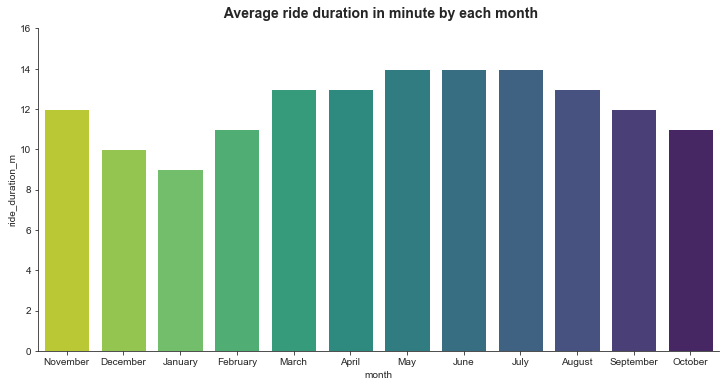

In [92]:
tab11 = df3.groupby('month')['ride_len_m'].median().to_frame()
g = sns.catplot(x=tab11.index, y='ride_len_m', data=tab11, kind='bar', palette='viridis_r', height=5, aspect=2)
g.fig.suptitle('      Average ride duration in minute by each month', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='month', ylabel='ride_duration_m', ylim=(0, 16))
plt.show()

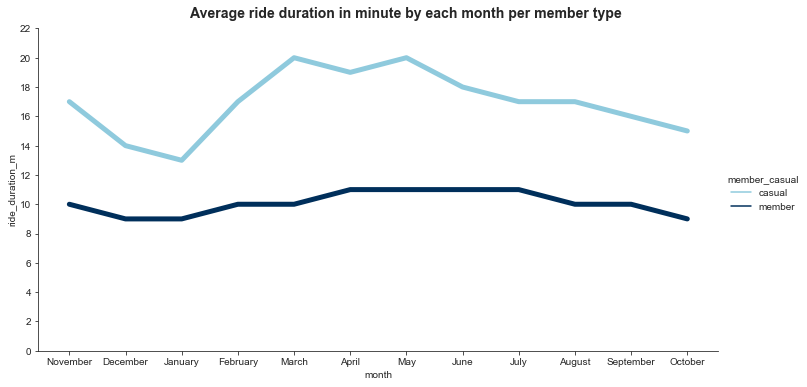

In [93]:
tab12 = df3.groupby(['month', 'member_casual'])['ride_len_m'].median().reset_index()
g = sns.relplot(x='month', y='ride_len_m', hue='member_casual', data=tab12, kind='line', palette=colors, height=5, aspect=2, linewidth=5)
g.fig.suptitle('Average ride duration in minute by each month per member type', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='month', ylabel='ride_duration_m', yticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.show()

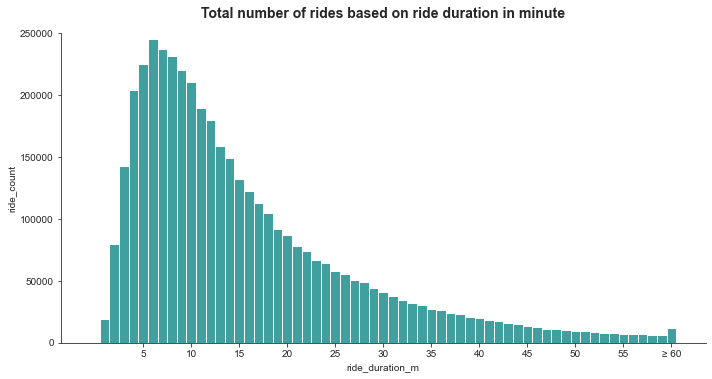

In [94]:
sns.displot(x='ride_len_m', data=df3, bins=range(62), color='teal', height=5, aspect=2)
positions = (5.5, 10.5, 15.5, 20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5, 55.5, 60.5)
labels = ('5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '≥ 60')
plt.xticks(positions, labels)
plt.ylim(0, 250000)
plt.title('Total number of rides based on ride duration in minute', y=1.03, fontsize=14, fontweight='bold')
plt.xlabel('ride_duration_m')
plt.ylabel('ride_count')
plt.show()

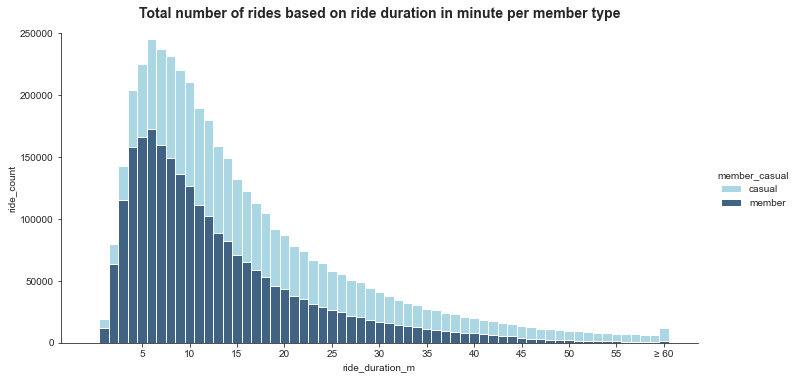

In [95]:
sns.displot(x='ride_len_m', hue='member_casual', data=df3, bins=range(62), height=5, aspect=2, palette=colors, multiple='stack')
positions = (5.5, 10.5, 15.5, 20.5, 25.5, 30.5, 35.5, 40.5, 45.5, 50.5, 55.5, 60.5)
labels = ('5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '≥ 60')
plt.xticks(positions, labels)
plt.ylim(0, 250000)
plt.title('Total number of rides based on ride duration in minute per member type', y=1.03, fontsize=14, fontweight='bold')
plt.xlabel('ride_duration_m')
plt.ylabel('ride_count')
plt.show()

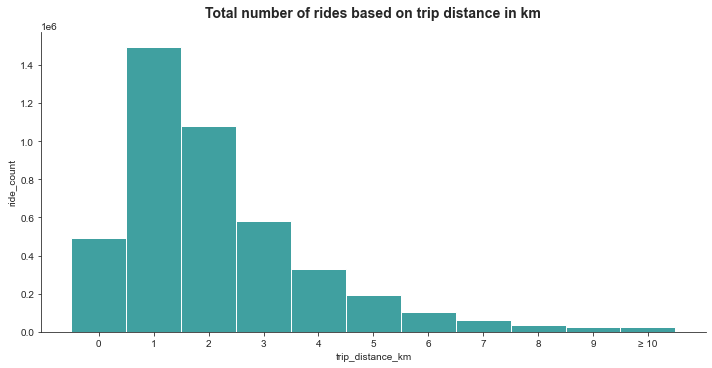

In [96]:
sns.displot(x='distance_km', data=df3, bins=range(12), color='teal', height=5, aspect=2)
positions = (0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5)
labels = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '≥ 10')
plt.xticks(positions, labels)
plt.title('Total number of rides based on trip distance in km', y=1.03, fontsize=14, fontweight='bold')
plt.xlabel('trip_distance_km')
plt.ylabel('ride_count')
plt.show()

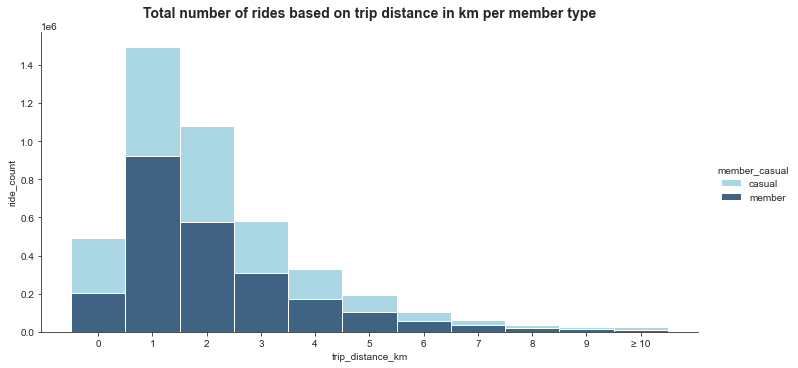

In [97]:
sns.displot(x='distance_km', hue='member_casual', data=df3, bins=range(12), height=5, aspect=2, palette=colors, multiple='stack')
positions = (0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5)
labels = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '≥ 10')
plt.xticks(positions, labels)
plt.title('Total number of rides based on trip distance in km per member type', y=1.03, fontsize=14, fontweight='bold')
plt.xlabel('trip_distance_km')
plt.ylabel('ride_count')
plt.show()

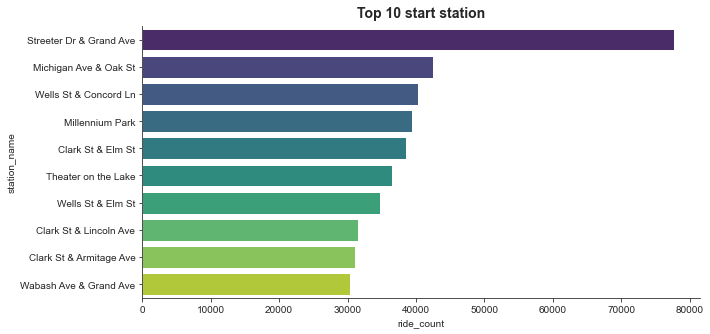

In [98]:
tab13 = df3['start_station_name'].value_counts(sort=True, ascending=False).to_frame().reset_index().head(10)
tab13 = tab13.rename(columns={'index':'start_station_name', 'start_station_name':'ride_count'})
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='ride_count', y='start_station_name', data=tab13, palette='viridis', ax=ax)
sns.despine()
plt.title('Top 10 start station', y=1.01, fontsize=14, fontweight='bold')
plt.xlabel('ride_count')
plt.ylabel('station_name')
plt.show()

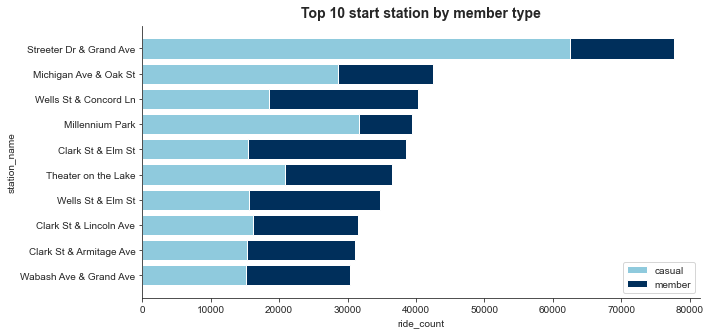

In [99]:
tab14 = df3[df3['start_station_name'].isin(tab13['start_station_name'])].groupby(['start_station_name', 'member_casual'])['ride_id'].count()
tab14 = tab14.unstack(0).reset_index().transpose().reset_index()
tab14.columns = tab14.iloc[0]
tab14 = tab14.drop(labels=0, axis=0).reset_index(drop=True).rename(columns={'member_casual':'start_station_name'})
tab14['total'] = tab14['casual'] + tab14['member']
tab14 = tab14.sort_values(by='total', ascending=True).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(tab14['start_station_name'], tab14['casual'], color='#8fcadd', label='casual')
ax.barh(tab14['start_station_name'], tab14['member'], left=tab14['casual'], color='#002f5b', label='member')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Top 10 start station by member type', y=1.01, fontsize=14, fontweight='bold')
ax.set_ylabel('station_name')
ax.set_xlabel('ride_count')
ax.legend()
plt.show()

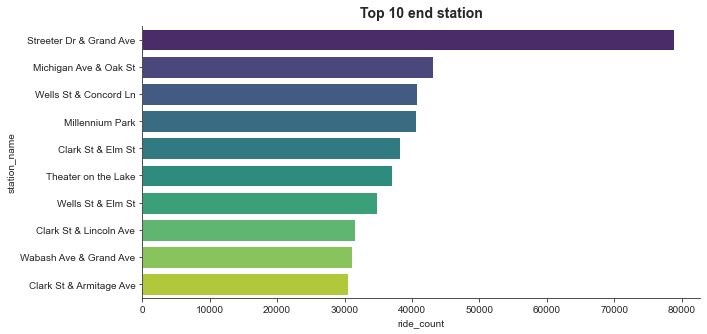

In [100]:
tab15 = df3['end_station_name'].value_counts(sort=True, ascending=False).to_frame().reset_index().head(10)
tab15 = tab15.rename(columns={'index':'end_station_name', 'end_station_name':'ride_count'})
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='ride_count', y='end_station_name', data=tab15, palette='viridis', ax=ax)
sns.despine()
plt.title('Top 10 end station', y=1.01, fontsize=14, fontweight='bold')
plt.xlabel('ride_count')
plt.ylabel('station_name')
plt.show()

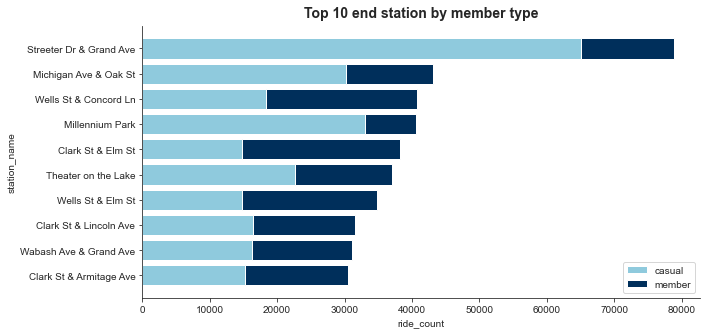

In [101]:
tab16 = df3[df3['end_station_name'].isin(tab15['end_station_name'])].groupby(['end_station_name', 'member_casual'])['ride_id'].count()
tab16 = tab16.unstack(0).reset_index().transpose().reset_index()
tab16.columns = tab16.iloc[0]
tab16 = tab16.drop(labels=0, axis=0).reset_index(drop=True).rename(columns={'member_casual':'end_station_name'})
tab16['total'] = tab16['casual'] + tab16['member']
tab16 = tab16.sort_values(by='total', ascending=True).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(tab16['end_station_name'], tab16['casual'], color='#8fcadd', label='casual')
ax.barh(tab16['end_station_name'], tab16['member'], left=tab16['casual'], color='#002f5b', label='member')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Top 10 end station by member type', y=1.01, fontsize=14, fontweight='bold')
ax.set_ylabel('station_name')
ax.set_xlabel('ride_count')
ax.legend()
plt.show()

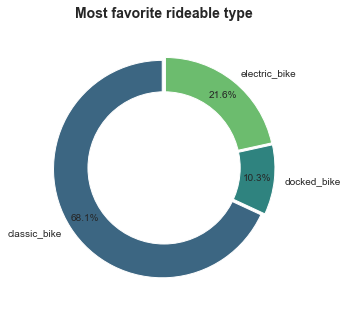

In [102]:
fig, ax = plt.subplots()
df3.groupby('rideable_type').size().plot(kind='pie', autopct='%1.1f%%', pctdistance=0.84, startangle=90, fontsize=10, ylabel='', figsize=(5,5), explode = (0.02, 0.02, 0.02), colors=['#3c6682', '#2f837f', '#6cbc6e'])
plt.gcf().gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title('Most favorite rideable type', y=1.03, fontsize=14, fontweight='bold')
plt.show()

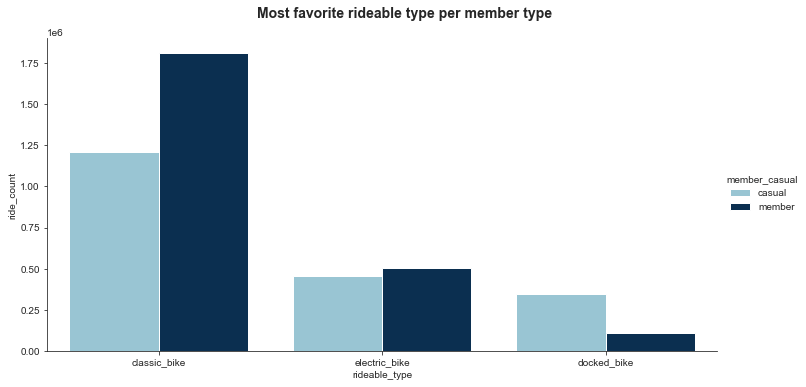

In [103]:
tab17 = df3.groupby(['rideable_type', 'member_casual'])['ride_id'].count().reset_index()
g = sns.catplot(x='rideable_type', y='ride_id', hue='member_casual', data=tab17, kind='bar', palette=colors, height=5, aspect=2, order=['classic_bike', 'electric_bike', 'docked_bike'])
g.fig.suptitle('Most favorite rideable type per member type', y=1.03, fontsize=14, fontweight='bold')
g.set(xlabel='rideable_type', ylabel='ride_count')
plt.show()

#### Conclusion
<p>How do annual members and casual riders use Cyclistic bikes differently?</p> 
<p>Please visit: <a href="https://fransiskusadrian.github.io" target="_blank">GitHub portfolio-website</a> </p> 


## End of Project

#### Author
Fransiskus Adrian

#### Change Log
| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2021-11-05        | 1.0     | Fransiskus Adrian | Project created                    |